---
title: "Fit plane tutorial"
description: "This tutorial use shows how to generate a plane based on a mesh. Using the `Hyperplane` and `Hyperplane` from `kornia.gemetry.plane`. As data structure we use `kornia.geometry.liegroup.So3` e `kornia.geometry.vector.Vector3`"
author:
    - "Edgar Riba"
date: 12-16-2022
categories:
    - Basic
    - Plane
    - kornia.geometry
image: "../tutorials/assets/fit_plane.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/fit_plane.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

In [ ]:
import matplotlib.pyplot as plt
import torch
from kornia.core import stack
from kornia.geometry.liegroup import So3
from kornia.geometry.plane import Hyperplane, fit_plane
from kornia.geometry.vector import Vector3
from kornia.utils import create_meshgrid

In [ ]:
# define the plane
plane_h = 25
plane_w = 50

# create a base mesh in the ground z == 0
mesh = create_meshgrid(plane_h, plane_w, normalized_coordinates=True)
X, Y = mesh[..., 0], mesh[..., 1]
Z = 0 * X

mesh_pts = Vector3.from_coords(X, Y, Z)

In [ ]:
# add noise to the mesh
rand_pts = Vector3.random((plane_h, plane_w))
rand_pts.z.clamp_(min=-0.1, max=0.1)

mesh_view: Vector3 = mesh_pts + rand_pts

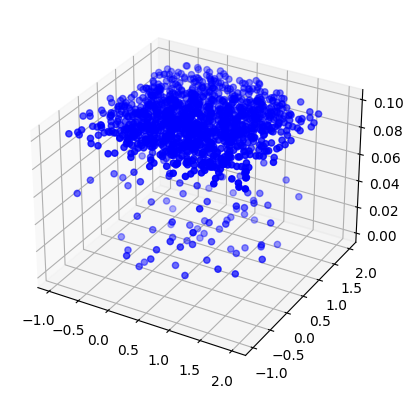

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(mesh_view.x, mesh_view.y, mesh_view.z, c="blue")
plt.show()

In [ ]:
# create rotation
angle_rad = torch.tensor(3.141616 / 4)
rot_x = So3.rot_x(angle_rad)
rot_z = So3.rot_z(angle_rad)
rot = rot_x * rot_z
print(rot)

Parameter containing:
tensor([ 0.8536,  0.3536, -0.1464,  0.3536], requires_grad=True)


In [ ]:
# apply the rotation to the mesh points
# TODO: this should work as `rot * mesh_view`
points_rot = stack([rot * x for x in mesh_view.view(-1, 3)]).detach()
points_rot = Vector3(points_rot)

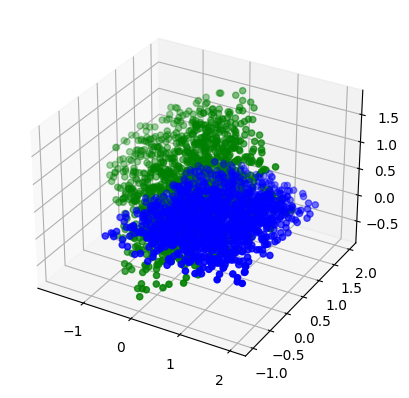

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(mesh_view.x, mesh_view.y, mesh_view.z, c="blue")
ax.scatter(points_rot.x, points_rot.y, points_rot.z, c="green")
plt.show()

In [ ]:
# estimate the plane from the rotated points
plane_in_ground_fit: Hyperplane = fit_plane(points_rot)
print(plane_in_ground_fit)

Normal: x: 0.00017263325571548194
y: -0.706676185131073
z: 0.707537055015564
Offset: -0.09553727507591248


In [ ]:
# project the original points to the estimated plane
points_proj: Vector3 = plane_in_ground_fit.projection(mesh_view.view(-1, 3))

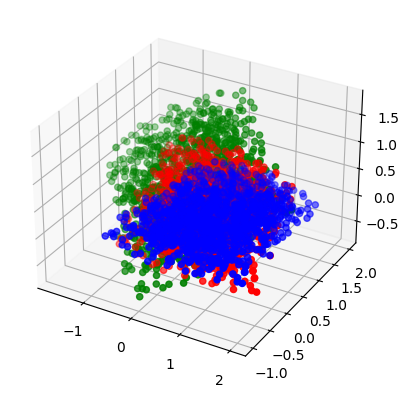

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(mesh_view.x, mesh_view.y, mesh_view.z, c="blue")
ax.scatter(points_rot.x, points_rot.y, points_rot.z, c="green")
ax.scatter(points_proj.x, points_proj.y, points_proj.z, c="red")
plt.show()